# Análisis Exploratorio de Datos

Se importa las librerias a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns

Se crea un DataFrame con los datos de la Categoría inflación

In [2]:
df = pd.read_csv('../Data/data_inflacion.csv')

Un .info() para tener idea de cuantas columnas y que tipo de datos hay en cada una de ellas, y si tenemos datos Nan

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   país            88 non-null     object 
 1   codigo_pais     88 non-null     object 
 2   factor_(serie)  88 non-null     object 
 3   codigo_serie    88 non-null     object 
 4   1987            77 non-null     float64
 5   1988            77 non-null     float64
 6   1989            77 non-null     float64
 7   1990            78 non-null     float64
 8   1991            78 non-null     float64
 9   1992            78 non-null     float64
 10  1993            79 non-null     float64
 11  1994            79 non-null     float64
 12  1995            80 non-null     float64
 13  1996            81 non-null     float64
 14  1997            81 non-null     float64
 15  1998            81 non-null     float64
 16  1999            81 non-null     float64
 17  2000            81 non-null     float

In [4]:
df.head()

,país,codigo_pais,factor_(serie),codigo_serie,1987,1988,1989,1990,1991,1992,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afganistán,AFG,"Inflación, índice de deflación del PIB (% anual)",NY.GDP.DEFL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.8228,0.5669,2.4476,-2.1975,2.4037,2.0713,6.5215,7.8217,0.4774,NaN
1,Afganistán,AFG,"Inflación, precios al consumidor (% anual)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3858,4.6740,-0.6617,4.3839,4.9760,0.6261,2.3024,NaN,NaN,NaN
2,Alemania,DEU,"Inflación, índice de deflación del PIB (% anual)",NY.GDP.DEFL.KD.ZG,1.2797,1.6905,2.8791,3.3966,3.0851,5.3062,...,1.9594,1.8779,1.8537,1.3278,1.5037,2.0075,2.1244,1.8108,3.0576,5.4828
3,Alemania,DEU,"Inflación, precios al consumidor (% anual)",FP.CPI.TOTL.ZG,0.2499,1.2741,2.7806,2.6965,4.0470,5.0570,...,1.5047,0.9068,0.5144,0.4917,1.5095,1.7322,1.4457,0.1449,3.0667,6.8726
4,Argelia,DZA,"Inflación, índice de deflación del PIB (% anual)",NY.GDP.DEFL.KD.ZG,8.8420,9.0610,16.0114,30.2596,53.7886,21.9261,...,-0.0933,-0.3006,-6.4557,1.5489,6.3907,6.7573,-0.4722,-5.0259,15.5672,19.7109


Se utiliza .describe() para obtener una visión general de las estadísticas clave de las columnas numéricas en tu conjunto de datos

In [5]:
columnas = ['1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001','2002', '2003']
descripcion1 = df[columnas].describe().round(2)
descripcion1

,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003
count,77.00,77.00,77.00,78.00,78.00,78.00,79.00,79.00,80.00,81.00,81.00,81.00,81.00,81.00,81.00,81.00,82.00
mean,18.95,32.06,84.77,110.48,25.33,52.49,79.32,73.79,14.89,9.54,5.77,5.09,5.75,5.90,5.33,3.96,4.54
std,45.25,108.46,405.53,504.13,70.50,224.21,335.27,341.83,30.00,15.82,6.67,7.43,14.55,12.56,9.62,5.88,5.50
min,-8.70,-11.61,-3.69,-0.78,-7.80,-12.91,-8.43,-0.26,-6.98,-2.67,-1.35,-13.93,-26.30,-7.71,-2.35,-5.23,-1.80
25%,1.68,2.79,2.92,3.53,3.13,1.86,1.66,1.94,2.14,1.57,1.56,0.92,0.38,1.37,1.66,1.24,1.33
50%,5.25,6.38,5.76,6.94,5.90,4.97,3.63,6.97,5.52,4.82,2.79,2.57,1.97,3.02,3.25,2.57,2.81
75%,11.47,13.42,13.79,16.47,18.62,15.35,13.49,22.16,11.46,8.98,7.28,6.93,6.73,5.29,5.01,4.30,6.35
max,228.34,629.11,3046.09,2947.73,432.79,1490.42,1996.15,2240.17,197.41,115.52,33.95,36.10,85.75,96.10,71.35,33.02,34.93


El análisis descriptivo de la serie temporal abarcando desde 1987 hasta 2003 proporciona una visión detallada de la evolución de los datos. La cantidad de observaciones varía a lo largo de los años, oscilando entre 77 y 82. La media exhibe una amplia variabilidad, desde valores bajos como 3.96 en 2003 hasta picos notables como 110.48 en 1990. La desviación estándar, que va desde 5.50 hasta 504.13, sugiere una dispersión significativa en los datos. Los valores mínimos y máximos reflejan la presencia de fluctuaciones extremas, con el mínimo de -26.30 en 1999 y el máximo de 3046.09 en 1989. Los percentiles detallan cómo se distribuyen los datos, resaltando, por ejemplo, que el 25% más bajo de los valores está por debajo de 2.14 y el 50% está por debajo de 5.52. Este análisis revela la complejidad y variabilidad de la serie temporal, destacando años específicos con valores extremos y proporcionando una comprensión integral de la evolución de los datos a lo largo del tiempo.

In [6]:
columnas = ['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
descripcion2 = df[columnas].describe().round(2)
descripcion2

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,82.00,83.00,83.00,84.00,85.00,86.00,86.00,86.00,86.00,86.00,86.00,85.00,85.00,84.00,84.00,84.00,83.00,83.00,80.00
mean,5.15,5.81,5.24,5.20,8.24,3.31,4.98,6.32,4.48,3.78,4.16,3.61,5.91,3.95,3.88,2.79,2.40,9.57,8.97
std,5.77,5.87,4.50,4.38,6.52,6.70,6.98,6.40,4.41,6.44,9.03,14.11,27.84,5.53,5.64,5.87,5.82,44.09,8.75
min,-5.36,-1.19,-0.86,-8.97,-1.38,-15.71,-5.15,-1.62,-0.76,-4.14,-2.25,-16.58,-5.53,-1.54,-0.64,-3.23,-12.03,-3.45,-5.51
25%,1.42,1.99,2.18,2.36,3.52,0.35,1.16,2.52,1.58,0.98,0.56,0.37,0.42,1.29,1.61,0.68,0.15,1.90,5.34
50%,3.15,3.90,3.56,3.82,7.00,1.97,3.16,4.50,3.26,2.29,1.89,1.51,1.73,2.27,2.28,1.88,1.38,3.12,7.08
75%,7.24,7.58,7.36,7.52,11.31,6.86,6.09,8.26,5.80,5.13,4.50,3.97,4.95,4.48,4.20,3.43,3.42,5.90,9.27
max,33.95,29.60,23.53,22.53,30.13,27.70,45.94,28.15,22.31,40.64,62.17,121.74,254.95,29.52,42.03,49.20,40.08,401.59,69.68


El análisis descriptivo de la serie temporal desde 2004 hasta 2022 proporciona una visión detallada de la evolución de los datos en este período. La cantidad de observaciones varía a lo largo de los años, oscilando entre 80 y 86. La media exhibe cierta variabilidad, con valores más altos en 2008 (8.24) y 2015 (5.91), mientras que los años 2019 y 2020 muestran medias más bajas de 2.40 y 2.79, respectivamente. La desviación estándar, que varía entre 4.41 y 44.09, sugiere una dispersión significativa en los datos durante estos años. Los valores mínimos y máximos reflejan la presencia de fluctuaciones extremas, con el mínimo de -16.58 en 2008 y el máximo de 401.59 en 2021. Los percentiles detallan cómo se distribuyen los datos, resaltando, por ejemplo, que el 25% más bajo de los valores está por debajo de 1.58 y el 50% está por debajo de 3.26. Este análisis revela la complejidad y variabilidad de la serie temporal, destacando años específicos con valores extremos y proporcionando una comprensión integral de la evolución de los datos en el período más reciente.

Para conocer si tenemos valores faltantes en las columnas de ['país'] ['codigo_pais'] ['factor_(serie)'] ['codigo_serie']

In [7]:
print(df['país'].isna().sum())
print(df['codigo_pais'].isna().sum())
print(df['factor_(serie)'].isna().sum())
print(df['codigo_serie'].isna().sum())


0
0
0
0


Veamos en que países se encuentran en estudio.

In [8]:
cantidad_paises = len(df['país'].unique())
print('Cantidad de paises en estudio:',cantidad_paises)
pd.DataFrame(df['país'].unique(), columns=['Países'])

Cantidad de paises en estudio: 44


,Países
0,Afganistán
1,Alemania
2,Argelia
3,Arabia Saudita
4,Argentina
5,Australia
6,Austria
7,Brasil
8,Burkina Faso
9,China


Veamos Variables se estudia

In [9]:
cantidad_series = len(df['factor_(serie)'].unique())
print('Cantidad de variables estudio:',cantidad_series)
serie_unicos = df['factor_(serie)'].unique()
print(serie_unicos)

Cantidad de variables estudio: 2
['Inflación, índice de deflación del PIB (% anual)'
 'Inflación, precios al consumidor (% anual)']


In [10]:
df[(df['país'] == 'Argentina') | (df['país'] == 'Cuba')]


,país,codigo_pais,factor_(serie),codigo_serie,1987,1988,1989,1990,1991,1992,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
8,Argentina,ARG,"Inflación, índice de deflación del PIB (% anual)",NY.GDP.DEFL.KD.ZG,127.5399,381.2463,3046.0912,2078.3168,140.5024,16.0720,...,23.9488,40.2830,26.5800,41.1194,26.0064,42.0337,49.1956,40.0769,54.1524,69.6829
9,Argentina,ARG,"Inflación, precios al consumidor (% anual)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Cuba,CUB,"Inflación, índice de deflación del PIB (% anual)",NY.GDP.DEFL.KD.ZG,0.6105,1.2332,0.6248,5.2613,-7.3878,3.7457,...,2.6578,3.4632,3.4396,4.3267,4.1152,1.0313,3.5470,16.5548,401.5883,NaN
35,Cuba,CUB,"Inflación, precios al consumidor (% anual)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Inflación, precios al consumidor (% anual) Cuba y Argentina 0 datos 

In [11]:
# Eliminar columnas específicas por nombre
columnas_a_eliminar = ['codigo_pais', 'codigo_serie']  # Lista con los nombres de las columnas a eliminar
df = df.drop(columnas_a_eliminar, axis=1)

In [12]:
# Reorganizar los datos para tener 'factor_(serie)' como índice y los años como valores en una sola columna
df_reorganizado = df.melt(id_vars=['país', 'factor_(serie)'], var_name='Año', value_name='Valor')

# Mostrar el DataFrame reorganizado
df_reorganizado

,país,factor_(serie),Año,Valor
0,Afganistán,"Inflación, índice de deflación del PIB (% anual)",1987,NaN
1,Afganistán,"Inflación, precios al consumidor (% anual)",1987,NaN
2,Alemania,"Inflación, índice de deflación del PIB (% anual)",1987,1.2797
3,Alemania,"Inflación, precios al consumidor (% anual)",1987,0.2499
4,Argelia,"Inflación, índice de deflación del PIB (% anual)",1987,8.8420
...,...,...,...,...
3163,Japón,"Inflación, precios al consumidor (% anual)",2022,2.4977
3164,Kenya,"Inflación, índice de deflación del PIB (% anual)",2022,6.0088
3165,Kenya,"Inflación, precios al consumidor (% anual)",2022,7.6569
3166,Noruega,"Inflación, índice de deflación del PIB (% anual)",2022,28.0333


In [13]:
df_reorganizado['Valor'].describe()

count    2953.000000
mean       17.055862
std       139.834476
min       -26.300000
25%         1.481400
50%         3.353100
75%         7.620800
max      3046.091200
Name: Valor, dtype: float64

In [14]:
repetitions = df_reorganizado['factor_(serie)'].value_counts()
print(repetitions)

Inflación, índice de deflación del PIB (% anual)    1584
Inflación, precios al consumidor (% anual)          1584
Name: factor_(serie), dtype: int64


In [15]:
unique_factors = df_reorganizado['factor_(serie)'].unique()

for factor in unique_factors:
    filtered_data = df_reorganizado[df_reorganizado['factor_(serie)'] == factor]
    description = filtered_data['Valor'].describe()
    print(f"Descripción para el factor '{factor}':\n{description}\n")

Descripción para el factor 'Inflación, índice de deflación del PIB (% anual)':
count    1548.000000
mean       19.449905
std       153.708483
min       -26.300000
25%         1.445925
50%         3.622000
75%         8.145500
max      3046.091200
Name: Valor, dtype: float64

Descripción para el factor 'Inflación, precios al consumidor (% anual)':
count    1405.000000
mean       14.418154
std       122.747322
min        -8.974700
25%         1.520400
50%         3.151200
75%         6.802800
max      2947.732800
Name: Valor, dtype: float64



Inflación, índice de deflación del PIB (% anual):
El factor "Inflación, índice de deflación del PIB (% anual)" abarca un total de 1548 observaciones. La media de este indicador se sitúa en un 19.45%, destacando una marcada variabilidad, indicada por la desviación estándar de 153.71. La distribución muestra un valor mínimo de -26.30% y un valor máximo significativamente alto de 3046.09%. Este amplio rango, evidenciado por los percentiles que van desde 1.45% hasta 8.15%, revela la presencia de valores extremos que afectan notablemente la media. La interpretación de este factor requeriría una atención especial a los valores atípicos que podrían influir en la percepción general de la inflación.

Inflación, precios al consumidor (% anual):
En cuanto al factor "Inflación, precios al consumidor (% anual)", se registran 1405 observaciones. La media para este indicador es del 14.42%, con una desviación estándar de 122.75, indicando nuevamente una variabilidad considerable. El valor mínimo es de -8.97%, y el valor máximo alcanza los 2947.73%. Los percentiles revelan que la mayoría de las observaciones se sitúan entre el 1.52% y el 6.80%. Al igual que en el factor anterior, se observa una influencia significativa de valores extremos, lo que enfatiza la necesidad de un análisis más profundo para comprender la verdadera dinámica de la inflación en este contexto.

In [16]:
def fill_missing_with_country_factor_mean(df):
    means_by_country_factor = df.groupby(['país', 'factor_(serie)'])['Valor'].transform('mean')
    df['Valor'] = df['Valor'].fillna(means_by_country_factor)
    return df

# Llamada a la función para rellenar los valores faltantes con la media por país y factor
df_filled = fill_missing_with_country_factor_mean(df_reorganizado)

In [17]:
df_filled

,país,factor_(serie),Año,Valor
0,Afganistán,"Inflación, índice de deflación del PIB (% anual)",1987,6.112895
1,Afganistán,"Inflación, precios al consumidor (% anual)",1987,6.124627
2,Alemania,"Inflación, índice de deflación del PIB (% anual)",1987,1.279700
3,Alemania,"Inflación, precios al consumidor (% anual)",1987,0.249900
4,Argelia,"Inflación, índice de deflación del PIB (% anual)",1987,8.842000
...,...,...,...,...
3163,Japón,"Inflación, precios al consumidor (% anual)",2022,2.497700
3164,Kenya,"Inflación, índice de deflación del PIB (% anual)",2022,6.008800
3165,Kenya,"Inflación, precios al consumidor (% anual)",2022,7.656900
3166,Noruega,"Inflación, índice de deflación del PIB (% anual)",2022,28.033300


In [18]:
df_filled['Valor'].describe()


count    3096.000000
mean       17.449182
std       136.728396
min       -26.300000
25%         1.558500
50%         3.519300
75%         7.873225
max      3046.091200
Name: Valor, dtype: float64

In [19]:
df_filled['Valor'].isna().sum()

72

Mostramos los paises que no tiene datos en los años seleccionados.

In [20]:
df_filled[df_filled['Valor'].isna()]['país'].unique()

array(['Argentina', 'Cuba'], dtype=object)

Debido a que no podemos inventar datos para esos años y para los países seleccionados, se procede a eliminar esas filas donde el valor es Nan

In [21]:
df_filled.dropna(inplace=True)

## Observemos la distribución de los factores por cada país a continuación 


In [22]:
# Obtener los factores únicos por país
factores_por_pais = df_filled.groupby(['país'])['factor_(serie)'].unique().apply(list).to_dict()

# Crear una lista con los nombres de los países en el DataFrame
paises = df_filled['país'].unique().tolist()

# Crear un widget de menú desplegable (dropdown) para seleccionar un país
dropdown_paises = widgets.Dropdown(
    options=paises,
    description='Seleccionar país:'
)

# Función para graficar los datos por país seleccionado
def graficar_datos_por_pais(pais):
    
    datos_pais = df_filled[df_filled['país'] == pais]

    fig = go.Figure()
    
    for factor in factores_por_pais[pais]:
        datos_factor = datos_pais[datos_pais['factor_(serie)'] == factor]
        fig.add_trace(go.Scatter(x=datos_factor['Año'], y=datos_factor['Valor'], mode='lines+markers', name=factor))
    
    fig.update_layout(
        title=f'Datos para {pais}',
        xaxis_title='Año',
        yaxis_title='Valor',
        legend=dict(x=0, y=-1.2, orientation='h'),
        height=450,
        width=1200
    )
    fig.show()

# Mostrar un widget vacío para eliminar el gráfico por defecto
display(widgets.Output())

# Interactividad: enlazar el widget de menú desplegable a la función de graficado
widgets.interactive(graficar_datos_por_pais, pais=dropdown_paises)

Output()

interactive(children=(Dropdown(description='Seleccionar país:', options=('Afganistán', 'Alemania', 'Argelia', …

### Seguido de esto, veremos como estan concentrados los datos y si existen valores atipicos (outliers) en nuestro dataset

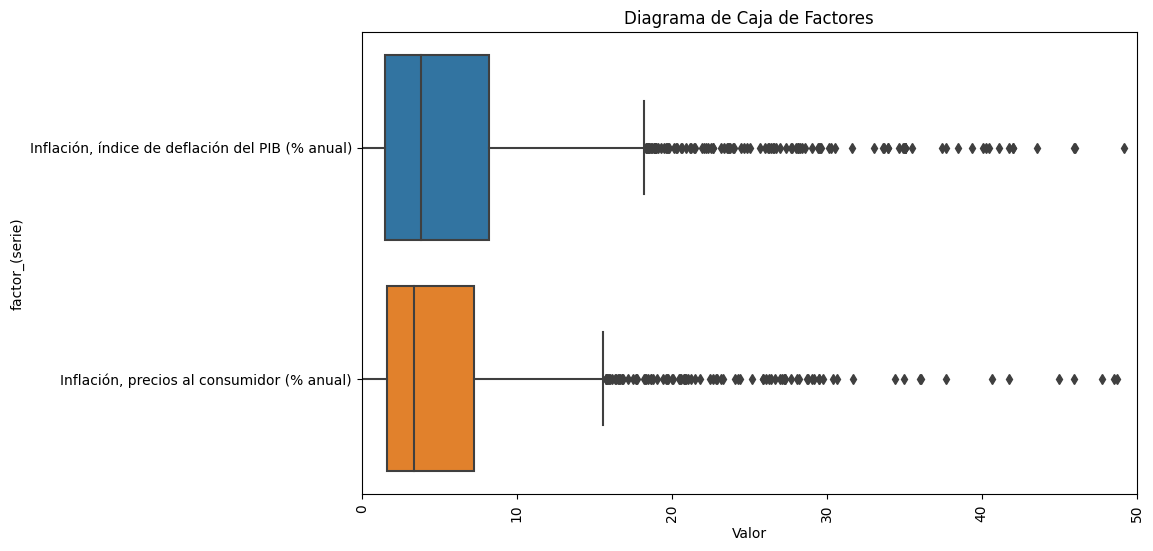

In [23]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el boxplot utilizando Seaborn
sns.boxplot(y='factor_(serie)', x='Valor', data=df_filled)
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.title('Diagrama de Caja de Factores')

# Configurar los límites del eje x para enfocarte en valores de 0 a 50 y superiores a 1000
plt.xlim(0, 50)  # Establecer límites para valores de 0 a 50 en el eje x
#plt.xscale('symlog', linthreshx=1000)  # Usar escala logarítmica para valores superiores a 1000

plt.show()

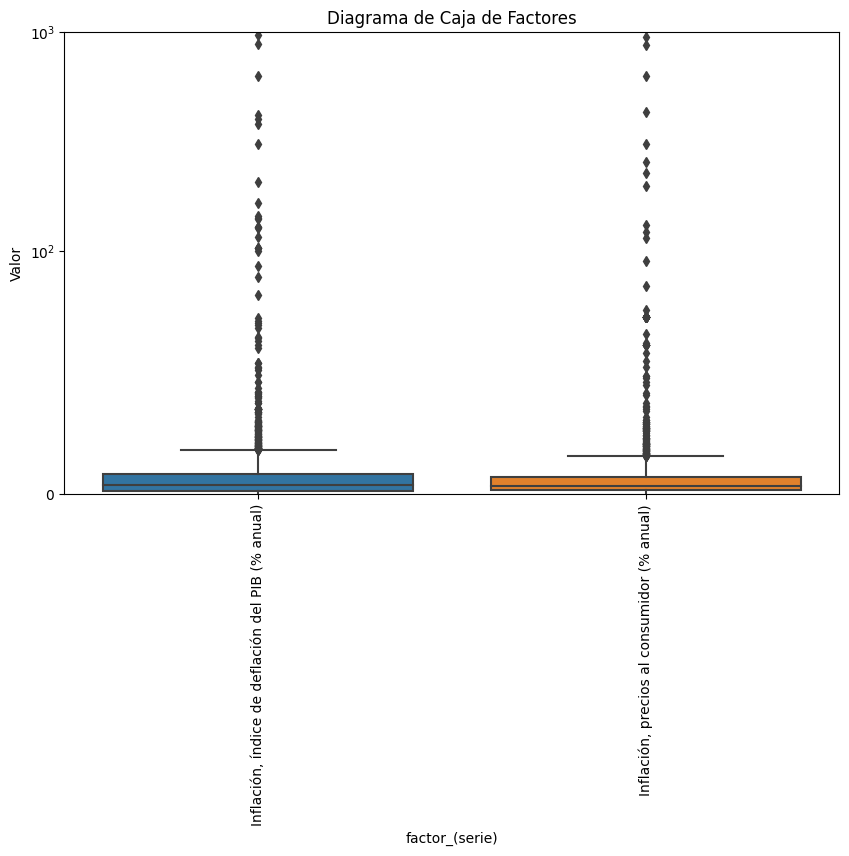

In [24]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el boxplot vertical utilizando Seaborn
sns.boxplot(x='factor_(serie)', y='Valor', data=df_filled, orient='v')  # 'v' indica orientación vertical
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.title('Diagrama de Caja de Factores')

# Configurar los límites del eje y para enfocarte en valores de 0 a 50 y superiores a 1000
plt.ylim(0, 1000)  # Establecer límites para valores de 0 a 50 en el eje y
# Ajustar la escala para resaltar valores superiores a 1000
plt.yscale('symlog', linthresh=100)
plt.show()

### A continuación, veremos Top 5 de países por factor

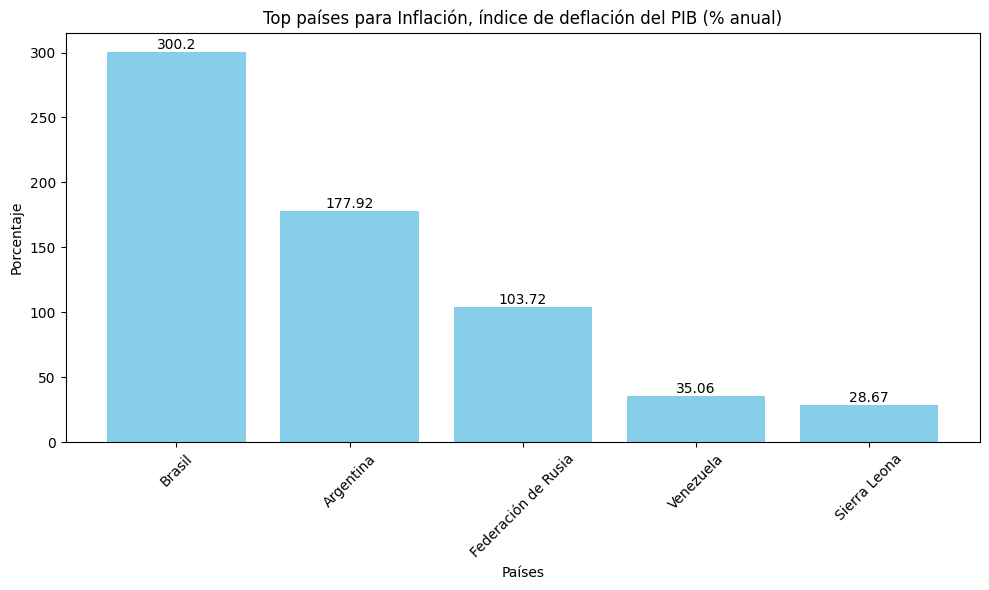

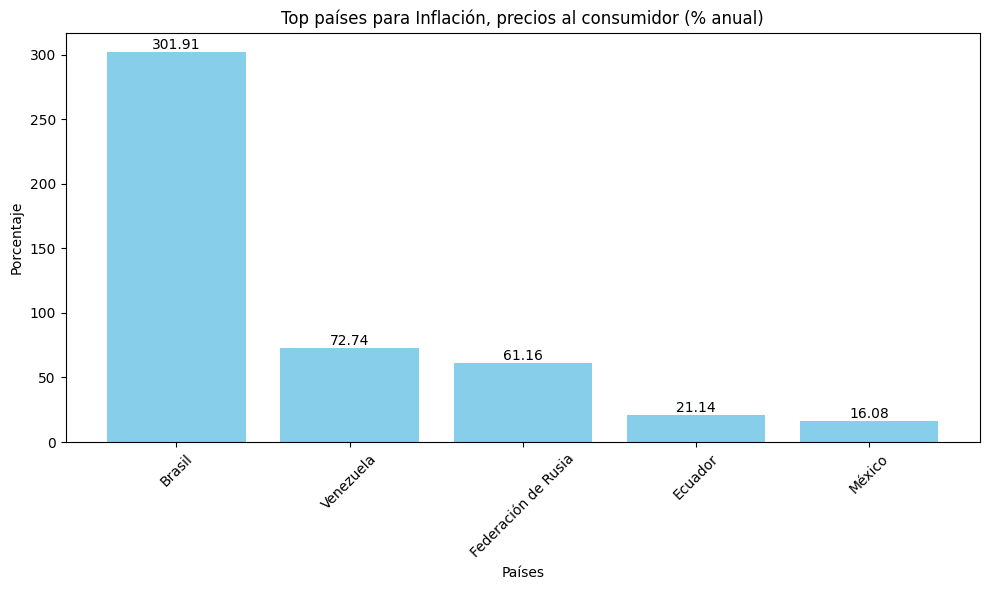

In [25]:


# Encontrar el top 5 de países para cada factor de la serie
factors = df_filled['factor_(serie)'].unique()  # Obtener la lista de factores únicos

for factor in factors:
    # Filtrar el DataFrame por cada factor de la serie
    filtered_df = df_filled[df_filled['factor_(serie)'] == factor]
    
    # Calcular la media de los valores por país en ese factor
    grouped = filtered_df.groupby('país')['Valor'].mean().reset_index()
    
    # Ordenar los valores por el porcentaje en orden descendente
    sorted_df = grouped.sort_values(by='Valor', ascending=False)
    
    # Obtener los top países para cada factor (puede ser menos de 5)
    top_countries = sorted_df.head(5)
    
    # Gráfico de barras para visualizar los top países con etiquetas de valores
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_countries['país'], top_countries['Valor'], color='skyblue')
    plt.title(f'Top países para {factor}')
    plt.xlabel('Países')
    plt.ylabel('Porcentaje')
    plt.xticks(rotation=45)
    
    # Etiquetas de valor en cada barra
    for bar, value in zip(bars, top_countries['Valor']):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

In [27]:
#df_filled.to_csv('../Data/data_inflacion_c.csv', index=False)